In [37]:
%matplotlib inline

In [38]:
#using xarray for data read
import xarray as xa
import numpy as np

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean


***If you are on a mac and use conda-forge and homebrew, cartopy will not work if you have gdal/geos installed via homebrew*** Oct 5 2017

In [39]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

In [40]:
#greater bering region
extent = [-180, -135, 45, 75]


## Compare timeseries of two SST retrieval algorithms at M8 (62.19N 174.689W - 185.311E)

In [41]:
### HRES OI V2 vs GHRSST vs blended

In [54]:
#avhrr only data from ncei
erddap_path_avhrr="http://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst2Agg"

#avhrr+amsr data is available for 2002-2011 from ncei
erddap_path_avhrramsre="http://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst2AmsrAgg"

#gh1sst data - ROMS from JPL
erddap_path_ghsst="http://coastwatch.pfeg.noaa.gov/erddap/griddap/jplG1SST"

#blended product from Remote Sensing Systems http://www.remss.com/
erddap_path_blended = "http://coastwatch.pfeg.noaa.gov/erddap/griddap/erdG1ssta1day"

In [57]:
e1rdf = xa.open_dataset(erddap_path_avhrramsre) 
sst_amsrpavhrr = e1rdf['sst'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(62,62.2),longitude=slice(185.25,185.5))
err_amsrpavhrr = e1rdf['err'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(62,62.2),longitude=slice(185.25,185.5))

In [56]:
e2rdf = xa.open_dataset(erddap_path_avhrr) 
sst_avhrr = e2rdf['sst'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(62,62.2),longitude=slice(185.25,185.5))
err_avhrr = e2rdf['err'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(62,62.2),longitude=slice(185.25,185.5))

In [44]:
thdf = xa.open_dataset(erddap_path_ghsst) 
sst_ghsst = thdf['SST'].sel(time=slice('2010-06-01','2010-09-20'),
                            latitude=slice(62.1875,62.195),longitude=slice(-174.69,-174.68))

In [45]:
bhdf = xa.open_dataset(erddap_path_blended) 
sst_bhsst = bhdf['analyzed_sst'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(62.1,62.2),longitude=slice(-174.69,-174.68))

(0, 10)

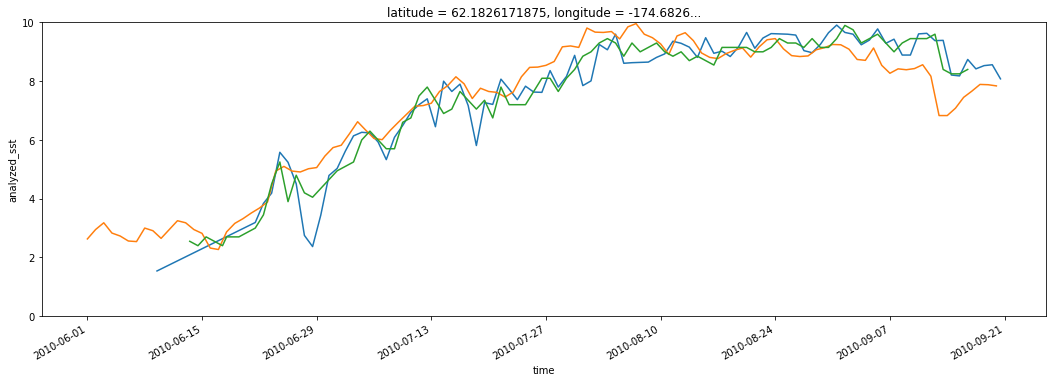

In [46]:
plt.figure(1, figsize=(18, 6), facecolor='w', edgecolor='w')
ax = plt.subplot(1,1,1)

sst_ghsst.plot() #blue
sst_amsrpavhrr.plot() #orange
sst_bhsst.plot() #green

ax.set_ylim([0,10])

In [61]:
sst_ghsst.data[:,0,0]

array([ 1.53999996,  3.19000006,  3.83999991,  4.19000006,  5.57999992,
        5.23999977,  4.51000023,  2.75      ,  2.36999989,  3.44000006,
        4.78999996,  5.03000021,  5.61999989,  6.13999987,  6.26000023,
        6.23999977,  5.92999983,  5.32999992,  6.09000015,  6.48999977,
        6.94000006,  7.19999981,  7.4000001 ,  6.44999981,  8.        ,
        7.6500001 ,  7.9000001 ,  7.17000008,  5.80999994,  7.26999998,
        7.21000004,  8.06999969,  7.73000002,  7.36999989,  7.82999992,
        7.63000011,  7.61999989,  8.35999966,  7.80000019,  8.15999985,
        8.88000011,  7.8499999 ,  8.01000023,  9.25      ,  9.06999969,
        9.60000038,  8.60999966,  8.63000011,  8.64000034,  8.64999962,
        8.81000042,  8.93000031,  9.35999966,  9.28999996,  9.15999985,
        8.81000042,  9.47999954,  8.94999981,  9.02000046,  8.84000015,
        9.15999985,  9.65999985,  9.11999989,  9.47000027,  9.61999989,
        9.60999966,  9.60000038,  9.56999969,  9.03999996,  8.97

In [60]:
sst_ghsst.time


<xarray.DataArray 'time' (time: 93)>
array(['2010-06-09T12:00:00.000000000', '2010-06-21T12:00:00.000000000',
       '2010-06-22T12:00:00.000000000', '2010-06-23T12:00:00.000000000',
       '2010-06-24T12:00:00.000000000', '2010-06-25T12:00:00.000000000',
       '2010-06-26T12:00:00.000000000', '2010-06-27T12:00:00.000000000',
       '2010-06-28T12:00:00.000000000', '2010-06-29T12:00:00.000000000',
       '2010-06-30T12:00:00.000000000', '2010-07-01T12:00:00.000000000',
       '2010-07-02T12:00:00.000000000', '2010-07-03T12:00:00.000000000',
       '2010-07-04T12:00:00.000000000', '2010-07-05T12:00:00.000000000',
       '2010-07-06T12:00:00.000000000', '2010-07-07T12:00:00.000000000',
       '2010-07-08T12:00:00.000000000', '2010-07-09T12:00:00.000000000',
       '2010-07-10T12:00:00.000000000', '2010-07-11T12:00:00.000000000',
       '2010-07-12T12:00:00.000000000', '2010-07-13T12:00:00.000000000',
       '2010-07-14T12:00:00.000000000', '2010-07-15T12:00:00.000000000',
       '2010-0